# Data: Past, Present, Future |  Lab 4  |  2/13/2020


## describing and predicting: Galton, regression, inventing error, survival curves, smoothing, 

# Galton and regression

Galton's analysis "gives the numerical value of the regression towards mediocrity in the case of human stature, as from 1 to 2/3 with unexpected coherence and precision [see Plate IX, fig. (a)]"

![Plate_9](https://www.researchgate.net/profile/Yeming_Ma2/publication/280970132/figure/fig1/AS:284517131669510@1444845578444/Rate-of-regression-in-hereditary-stature-Galton-1886-Plate-IX-fig-a-The-short_Q320.jpg)

The paper can be found at:

http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf

Download it and follow along!

## Galton's data 

![galton_notebook](http://www.medicine.mcgill.ca/epidemiology/hanley/galton/notebook/images/1_page_1.jpg)
(h/t http://www.medicine.mcgill.ca/epidemiology/hanley/galton/)


Let's use some of Galton's data from his study exploring the relationship between the heights of adult children and the heights of their parents. The data includes the following fields:


    Family: The family that the child belongs to, labeled from 1 to 204 and 136A
    Father: The father's height, in inches
    Mother: The mother's height, in inches
    Gender: The gender of the child, male (M) or female (F)
    Height: The height of the child, in inches
    Kids: The number of kids in the family of the child


In [1]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
heights=pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep="\t") # Note "\t" = tab separation

In [3]:
heights.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [4]:
heights["Height"].mean()

66.76069042316259

Let's say we want only the people identified as male. We can use something called boolean indexing to pick out just the males.

In [5]:
heights_male=heights[heights["Gender"]=="M"]

In [6]:
heights_male.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


So we can use some of our favorite tools in data analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc587fa05c0>,
      dtype=object)

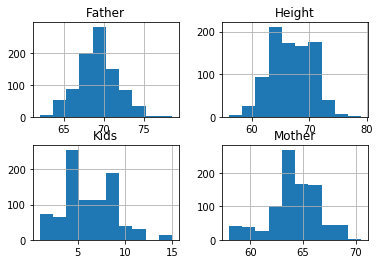

In [7]:
heights.hist()

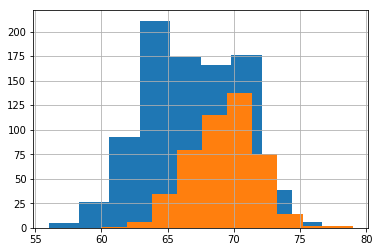

In [8]:
heights["Height"].hist()
heights_male["Height"].hist()

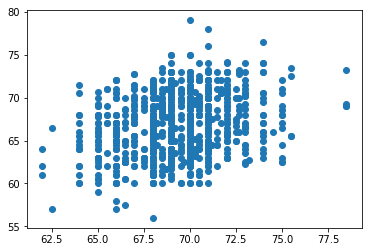

In [9]:
plt.scatter(heights["Father"],heights["Height"])

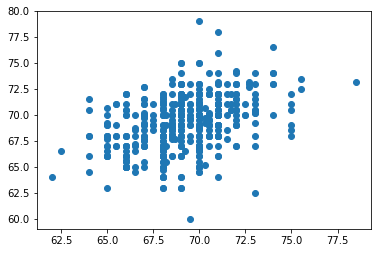

In [10]:
plt.scatter(heights_male["Father"],heights_male["Height"])

Galton wanted to use the data on women. What would he need to do?

>In everycase I transmuted the female statures to their corresponding male equivalents and used them in their transmuted form, so that no objection grounded on the sexual difference of stature need be raised when I speak of averages. The factor I used was 1-08, which is equivalent to adding a little less than one-twelfth to each female height.

Hello, subjective design choice!

So how do we do this?

In python, as easy to multiple every value in a column by a given amount as it is to multiple one value.

We can pick out all the women using boolean indexing.

*NOTE THE DOUBLE EQUALS (==) which says "python ARE these equal" NOT "python SET these equal"*


In [11]:
heights[heights["Gender"]=="F"]

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4
9,3,75.0,64.0,F,68.0,2
12,4,75.0,64.0,F,67.0,5
13,4,75.0,64.0,F,64.5,5
14,4,75.0,64.0,F,63.0,5
18,5,75.0,58.5,F,66.5,6


And then pick out only the heights:

In [12]:
heights[heights["Gender"]=="F"]["Height"]

1      69.2
2      69.0
3      69.0
6      65.5
7      65.5
9      68.0
12     67.0
13     64.5
14     63.0
18     66.5
19     62.5
20     62.5
21     69.5
26     70.5
27     64.0
28     70.5
29     68.0
30     66.0
31     66.0
32     65.5
35     68.0
36     67.0
37     67.0
38     66.0
39     63.5
40     63.0
41     65.0
46     66.7
52     68.7
53     66.5
       ... 
838    61.0
839    59.0
841    65.5
846    64.5
847    60.5
850    64.0
851    64.0
852    62.5
853    60.5
855    63.0
858    63.0
862    63.5
867    62.0
870    65.5
871    64.0
872    62.0
873    62.0
874    61.0
877    67.0
878    65.0
879    64.0
880    64.0
881    60.0
884    60.0
886    62.0
887    61.0
889    57.0
895    64.0
896    63.5
897    63.0
Name: Height, Length: 433, dtype: float64

Now let's multiply all the women's heights by 1.09 as Galton tells us.

In [13]:
heights[heights["Gender"]=="F"]["Height"]*1.09

1      75.428
2      75.210
3      75.210
6      71.395
7      71.395
9      74.120
12     73.030
13     70.305
14     68.670
18     72.485
19     68.125
20     68.125
21     75.755
26     76.845
27     69.760
28     76.845
29     74.120
30     71.940
31     71.940
32     71.395
35     74.120
36     73.030
37     73.030
38     71.940
39     69.215
40     68.670
41     70.850
46     72.703
52     74.883
53     72.485
        ...  
838    66.490
839    64.310
841    71.395
846    70.305
847    65.945
850    69.760
851    69.760
852    68.125
853    65.945
855    68.670
858    68.670
862    69.215
867    67.580
870    71.395
871    69.760
872    67.580
873    67.580
874    66.490
877    73.030
878    70.850
879    69.760
880    69.760
881    65.400
884    65.400
886    67.580
887    66.490
889    62.130
895    69.760
896    69.215
897    68.670
Name: Height, Length: 433, dtype: float64

Actually Galton had computer trouble:
>owing to a mistaken direction, the computer to whom I first entrusted the figures used a  somewhat different factor, yet the result came out closely the same.

Been there, bro. Been there.

What does "computer" mean here?

And now put it all together by replacing the old values with the "transmuted" ones.

In [14]:
heights_transmuted=heights

In [15]:
heights_transmuted.loc[heights["Gender"]=="F","Height"]=heights[heights["Gender"]=="F"]["Height"]*1.09

In [16]:
heights_transmuted

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.200,4
1,1,78.5,67.0,F,75.428,4
2,1,78.5,67.0,F,75.210,4
3,1,78.5,67.0,F,75.210,4
4,2,75.5,66.5,M,73.500,4
5,2,75.5,66.5,M,72.500,4
6,2,75.5,66.5,F,71.395,4
7,2,75.5,66.5,F,71.395,4
8,3,75.0,64.0,M,71.000,2
9,3,75.0,64.0,F,74.120,2


Next, Galton decides to combine the heights of the father and mother, transmuted by 1.08, to create what he calls the *midparent*.

In [17]:
midheights=(heights_transmuted["Father"]+1.08*heights_transmuted["Mother"])/2

As promised, it's almost too easy to do linear regression:

# Intermission ------

## Recall the "double role" of statistics in Politics:
1. <b>construction of statistical entities</b>: "stable objects" can be measured and used as forms of evidence and certainty (e.g., the GDP, unemployment, life expectation, citation indexs, etc.)
2. <b>explication and analysis of relationships between entities</b>: what are the relationships between objects and how does changing one influence others? 

<small>(See, for instance, Desrosieres, _The Politics of Large Numbers_ (1998), 61.)</small>

#### To better understand how statistical entities' "double role" in being used to make an argument, let's look at linear regression. But we first need to understand the innovations that made it thinkable to model error. 

# Inventing error & equating "objective" and "subjective" means -----

Let's say you want to determine the position of a star in the sky. You have bunch of observations of the sky you produced here just outside of New York. You also have a bunch of observations taken in Hawaii. Today we'd just combine the observations, assuming that the distribution of the error is a gaussian. Imagine we are measuring the position of a star *in only 1-dimension*, i.e., we are measuring a star only along the x-axis.
![star_obs](./fig/Star.obs.jpeg)
<small>(Note that this is an example of an "objective mean".)</small>


#### However, it requires an argument to assume error would be distributed in this way! 
It wasn't obvious that error would be normally distributed at the start of the 19th century! In the 18th century they tried to deal with questions of modeling error either (1) by averaging observations to reduce the number of equations or (2) by minimizing the sum of the absolute values of the residuals. <b> In 1805 Legendre gave the "method of least squares"</b> in which we have the following situation:
![Residuals!](./fig/Residuals.jpeg)
where each residual, $r_i$, can be written as

$ r_i = y_i - y(x_i, \beta_i)$

which is the distance between the $i^{th}$ observation $y_i$. The "best fit line" is $y = \beta_0 + \beta_1(x)$, denoted in blue above, and satisfies the following "least squares" condition:

$min \sum{r_i} = min \sum_{i = 1}^{i}{(y_i-y(x_i,\beta_i))^2}$

--that is, the line minimizes the square of the residuals.  

The least squares method was the solution to an empirical problem <b>as long as the error could be assumed to be randomly produced</b>, but in 1810 Laplace realized that any distribution of errors (i.e., residuals) would produce a gaussian. What did he "discover" to justify this? 

<b>The Central Limit Theorem:</b> 
0. Start with *any* distribution, known or unknown. 
1. Take $N$ samples of $X$ observations.
2. Take the mean of $X$ observations for each sample.
3. Plot the means of the samples.
4. The histogram of the sample of the means will <b>tend toward a gaussian as $N \rightarrow \infty $

...*that is, regardless of the distribution of your residuals, the means of $N$ samples of $X$ observations will always produce a gaussian distribution when one takes enough samples!*

Lets verify this for ourselves! To begin, we need to do a little python housekeeping. You can ignore the following code for now: it just does in code the process of taking means of $N$ samples of $X$ observations. 


In [71]:
from numpy.random import beta
from numpy.random import binomial 
from scipy.stats import beta as scipy_beta
from scipy.stats import binom as scipy_binom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generates S samples of N randomly sampled variables
def samples_from_binom(num_of_samples, sample_size):
    samples = binomial(10, 0.5, size=[num_of_samples, sample_size])
    return samples

def means_of_samples(samples_from_binom, num_of_samples, sample_size):
    means = []
    for sample in range(num_of_samples):
        means.extend([samples_from_binom[sample].mean()])
    means = np.array(means)    
    return means

def gaussian_curve_overlay(data, x):
    sigma = data.std()
    mu = data.mean()
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 
    return

Now lets take a curve that's not quite the same as a Gaussian distribution. This is a binomial distribution, and it models the number of "successes" in an experiment with n trials and p probability of success. (Think about flipping a coin 100 times-- how many times would you expect a heads?) (Also note-- you do not need to memorize the technical details of these distributions). 


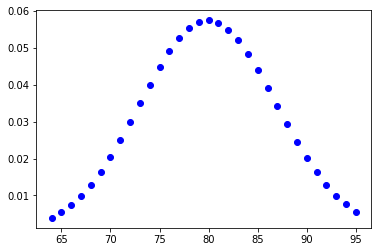

In [79]:
x = np.arange(scipy_binom.ppf(0.01, n, p), scipy_binom.ppf(0.99, n, p))
plt.plot(x, scipy_binom.pmf(x, n, p),"bo", label='binom pmf')


Now lets examine a few plots so see how producing a historgram of the mean of more and more samples eventually converges to a gaussian distribution. 

#### To start, let's plot the means of 100 samples of 10 observations each from the above distribution:

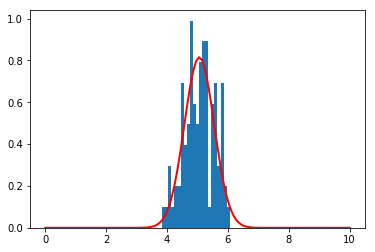

In [74]:
x = np.linspace(0, 10, 100)
num_of_samples = 100
num_of_random_vars = 10
data = means_of_samples(samples_from_binom(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

Not quite a gaussian yet, but is promising! <b>What about the means of 1000 samples of 10 observations each?</b>

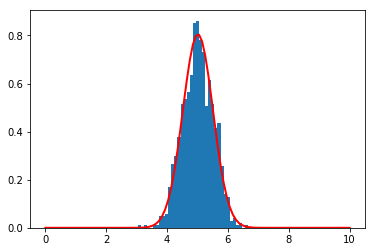

In [76]:
# For 1000 samples...
x = np.linspace(0, 10, 100)
num_of_samples = 1000
num_of_random_vars = 10
data = means_of_samples(samples_from_binom(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)

plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

Even closer to a normal curve! <b>What about for 100,000 samples?</b>

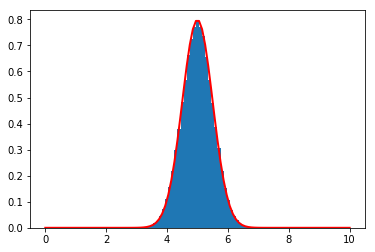

In [78]:
# For 100000 samples...
x = np.linspace(0, 10, 100)
num_of_samples = 100000
num_of_random_vars = 10
data = means_of_samples(samples_from_binom(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

Looks pretty close to a gaussian curve! It took nearly a century to build off of the Gauss-Laplace synthesis, largely because of the interpretative challenge of equating objective and subjective means as interchangable  (something that happened with Pearson, Galton, and others at then end of the 19th century).

## Least Squares and Regression
Let's take a look at our residuals graph from earlier. 
![Residuals!](./fig/Residuals.jpeg)
Today we tend to see a plot like this in the context of linear regression. The task of linear regression is just to find the blue line for a particular set of data, via the method of least squares discussed above. Thanks to python, it's very, very easy to do simple linear regression using least squares.  

Linear Regression IN GENERAL:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

Linear Regression FOR JUST ONE VARIABLE:

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x$ are the observations, and $\mu$ is the y-intercept.  

# Back to Galton

Galton was a bit fuzzy on much of this math. Let's do some linear regressions on his height data.

In [23]:
from sklearn import linear_model

#first we say, hey! we want to do linear regression
skl_lm = linear_model.LinearRegression()  #it's like cool...but on what?

In [24]:
#note that scikit-learn requires an input-matrix of a particular shape...
#here we just transform our data into the format it requires
x=heights_transmuted["Father"]
y=heights_transmuted["Height"]
x=np.array(x.values.tolist())
y=np.array(y.values.tolist())
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [25]:
# generate model
skl_lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that we've run the model, we can ask for the coefficient $\beta_1$ of the equation


$y = \beta_1 x_1 + \mu$ 

Say, python what's $\beta_1$?

In [26]:
beta1=skl_lm.coef_

In [27]:
beta1

array([[0.45149084]])

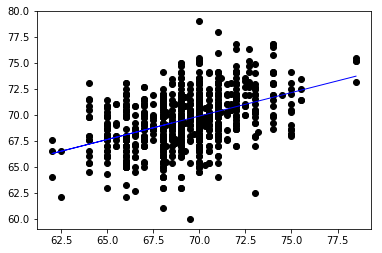

In [28]:
# plot fit line
plt.scatter(x, y,  color='black')
plt.plot(x, skl_lm.predict(x), color='blue', linewidth=1)
plt.show()

*Now it's your turn!* 

can you the regression for 

1. everybody and his/her mother?
2. males and fathers
